In [ ]:
import torch
from torch import nn
from torchsummary import summary
import torch.nn.functional as F

: 

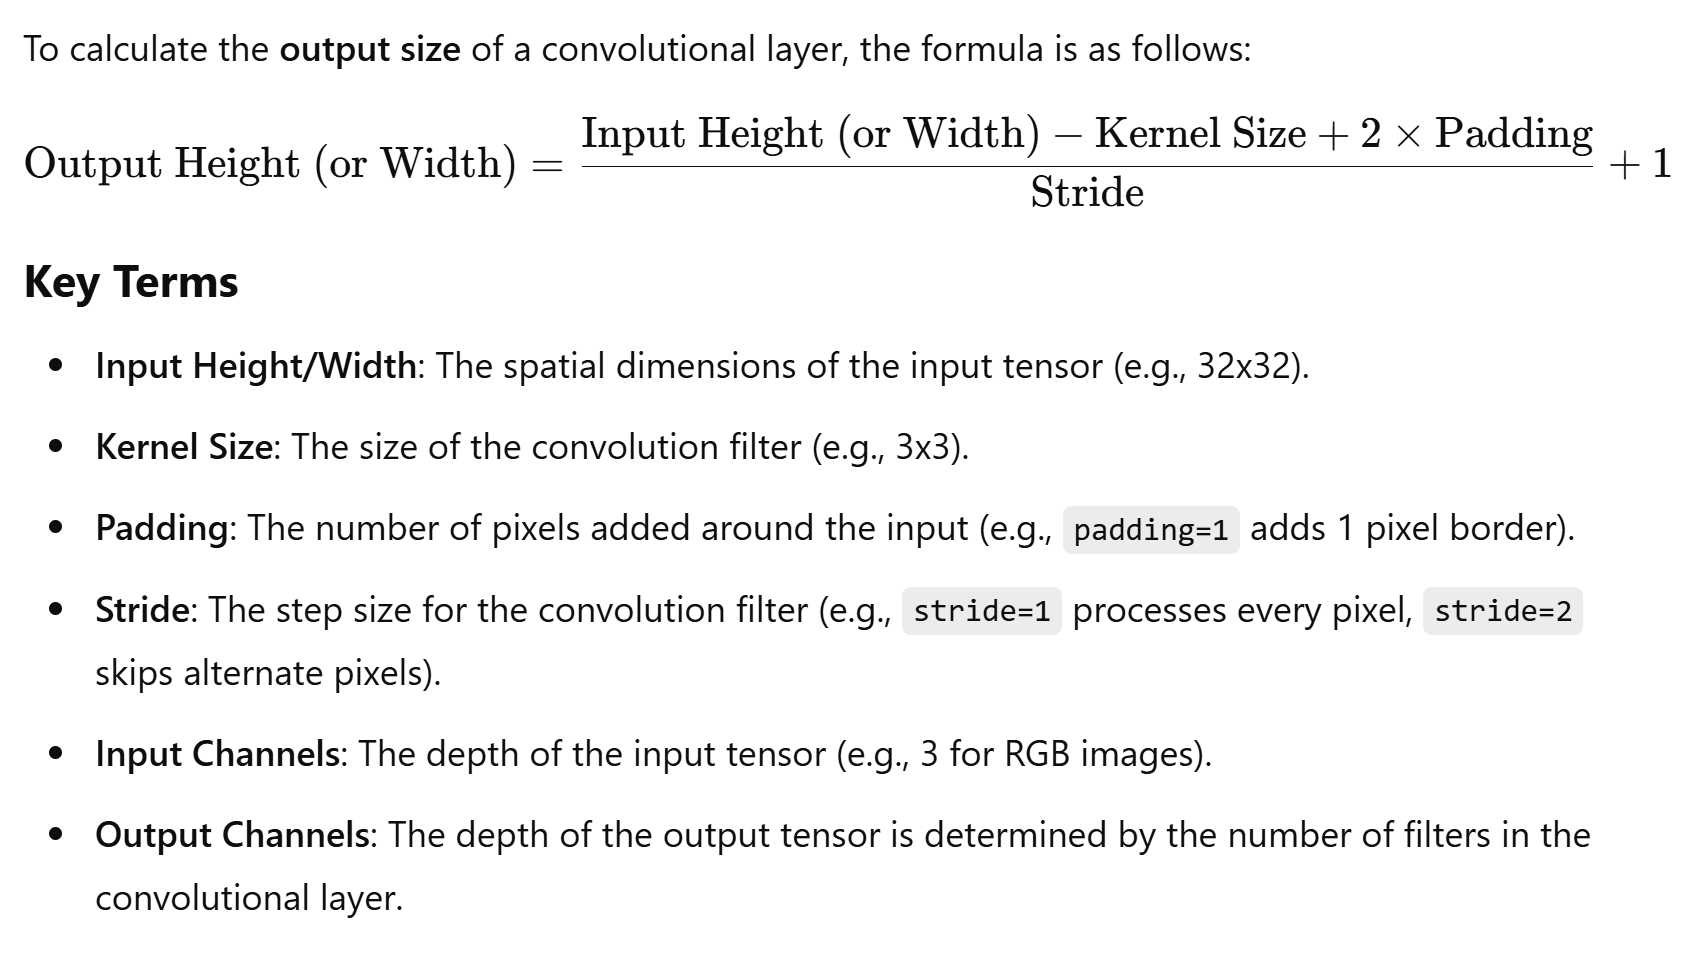
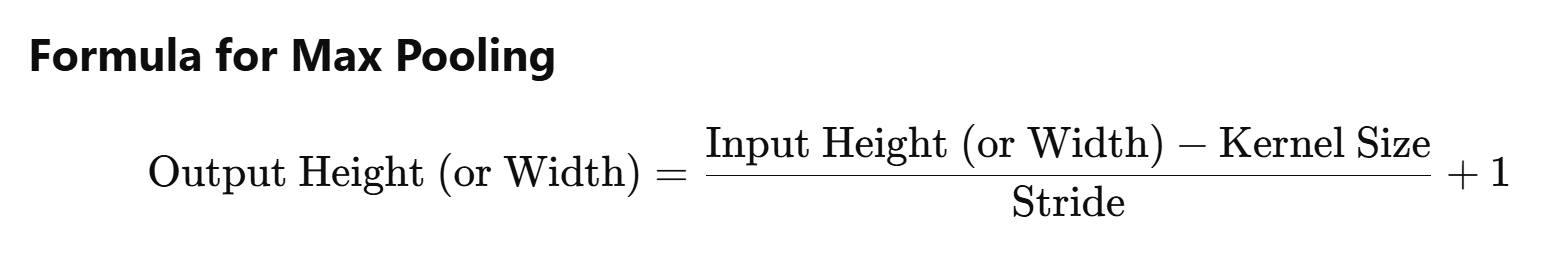

In [12]:
class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super(AlexNet, self).__init__()
        
        self.ReLu = nn.ReLU()
        
        self.c1 = nn.Conv2d(in_channels = 1, out_channels = 96, kernel_size = 11, stride = 4)
        self.s2 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        
        self.c3 = nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, stride = 1, padding = 2)
        self.s4 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        
        self.c5 = nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, stride = 1, padding = 1)
        self.c6 = nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, stride = 1, padding = 1)
        self.c7 = nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        
        self.s8 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        
        self.flatten = nn.Flatten()        
        self.fc1 = nn.Linear(in_features = 256 * 6 * 6, out_features = 4096)
        self.fc2 = nn.Linear(in_features = 4096, out_features = 4096)
        self.fc3 = nn.Linear(in_features = 4096, out_features = num_classes)  #out_features is the number of classes
        
    def forward(self, x):
        x = self.ReLu(self.c1(x))
        x = self.s2(x)
        x = self.ReLu(self.c3(x))
        x = self.s4(x)
        x = self.ReLu(self.c5(x))
        x = self.ReLu(self.c6(x))
        x = self.ReLu(self.c7(x))
        
        x = self.s8(x)
        x = self.flatten(x)
        
        x = self.ReLu(self.fc1(x))        
        x = F.dropout(x, 0.5)
        
        x = self.ReLu(self.fc2(x))
        x = F.dropout(x, 0.5)
        
        x = self.fc3(x)
        return x

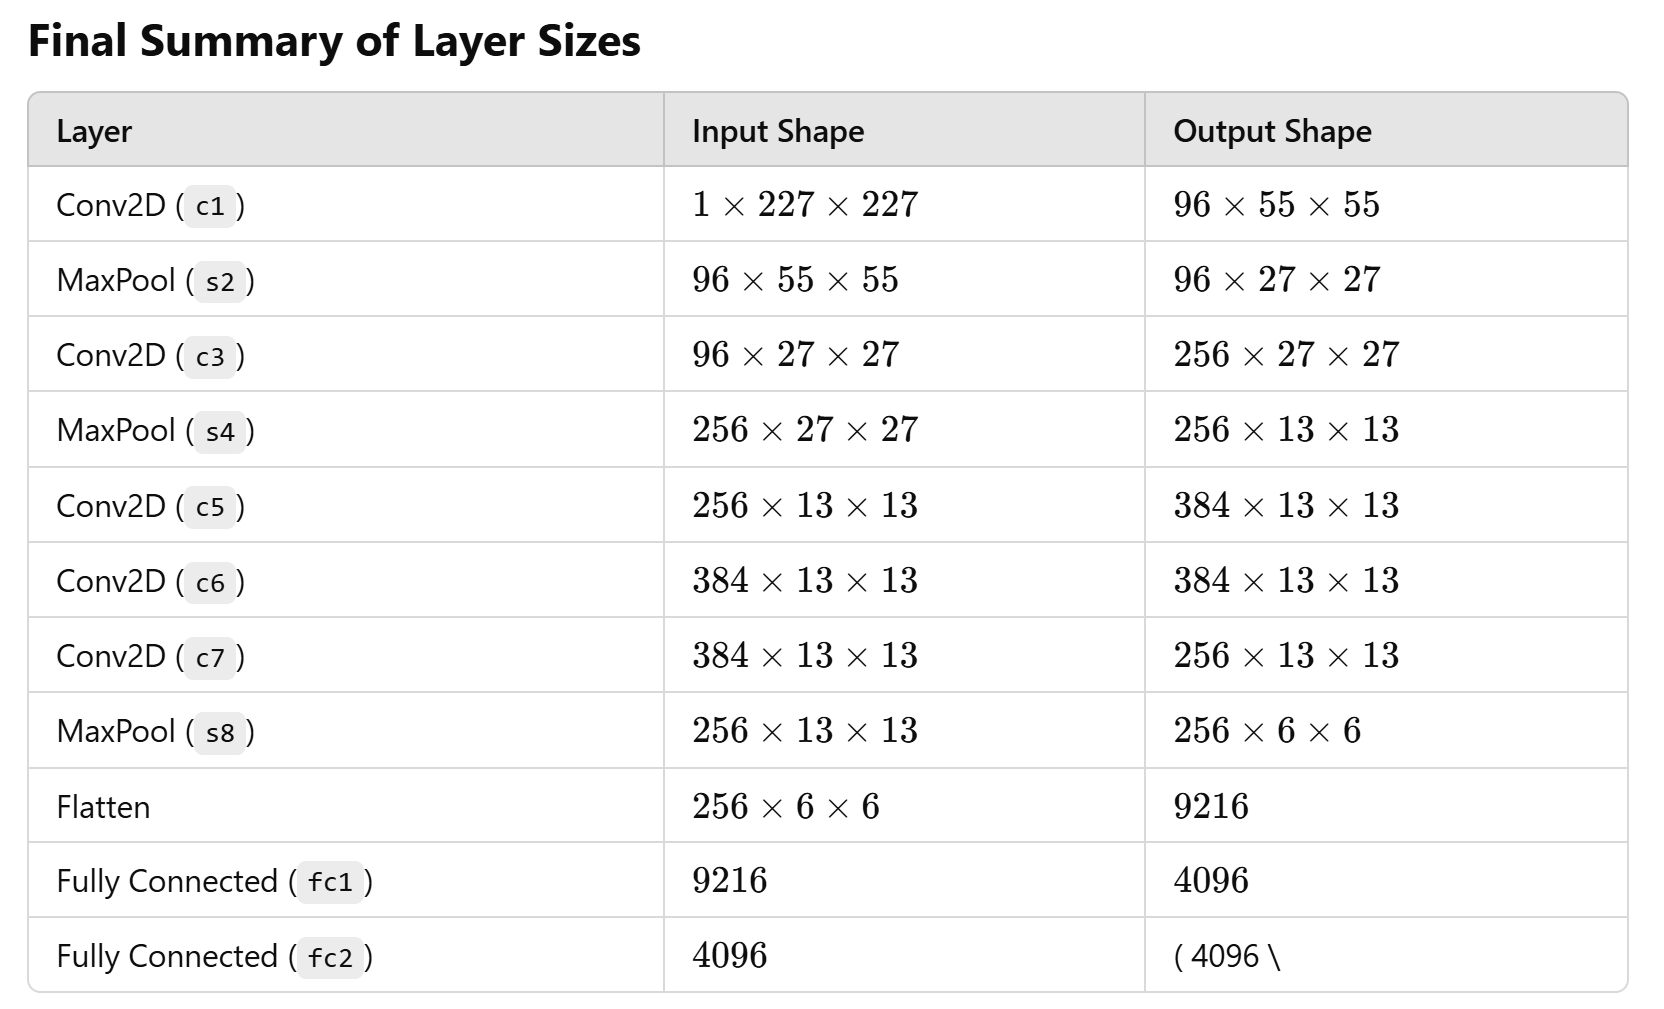

In [13]:
if __name__ == '__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = AlexNet().to(device)
  
      

In [14]:
print(model)

AlexNet(
  (ReLu): ReLU()
  (c1): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
  (s2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (s4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c5): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c6): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c7): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (s8): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=1000, bias=True)
)


In [1]:
import torch
import torch.nn as nn
from torchvision.models import alexnet

# Load a pre-defined AlexNet model
model = alexnet()

# Define a function to print the shape of the input and output
def print_shape_hook(module, input, output):
    print(f"{module.__class__.__name__} - Input shape: {input[0].shape}, Output shape: {output.shape}")

# Register hooks for each layer
for layer in model.features:
    layer.register_forward_hook(print_shape_hook)
for layer in model.classifier:
    if isinstance(layer, nn.Linear):
        layer.register_forward_hook(print_shape_hook)

# Create a dummy input with the shape (batch_size, channels, height, width)
dummy_input = torch.randn(1, 3, 227, 227)  # Batch size of 1, 3 channels (RGB), 227x227 image

# Perform a forward pass to trigger the hooks
output = model(dummy_input)


d:\software_install\anaconda3\envs\torch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'D:\software_install\anaconda3\envs\torch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Conv2d - Input shape: torch.Size([1, 3, 227, 227]), Output shape: torch.Size([1, 64, 56, 56])
ReLU - Input shape: torch.Size([1, 64, 56, 56]), Output shape: torch.Size([1, 64, 56, 56])
MaxPool2d - Input shape: torch.Size([1, 64, 56, 56]), Output shape: torch.Size([1, 64, 27, 27])
Conv2d - Input shape: torch.Size([1, 64, 27, 27]), Output shape: torch.Size([1, 192, 27, 27])
ReLU - Input shape: torch.Size([1, 192, 27, 27]), Output shape: torch.Size([1, 192, 27, 27])
MaxPool2d - Input shape: torch.Size([1, 192, 27, 27]), Output shape: torch.Size([1, 192, 13, 13])
Conv2d - Input shape: torch.Size([1, 192, 13, 13]), Output shape: torch.Size([1, 384, 13, 13])
ReLU - Input shape: torch.Size([1, 384, 13, 13]), Output shape: torch.Size([1, 384, 13, 13])
Conv2d - Input shape: torch.Size([1, 384, 13, 13]), Output shape: torch.Size([1, 256, 13, 13])
ReLU - Input shape: torch.Size([1, 256, 13, 13]), Output shape: torch.Size([1, 256, 13, 13])
Conv2d - Input shape: torch.Size([1, 256, 13, 13]), Output